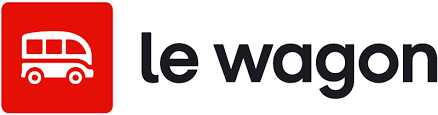

# Restaurant analysis

Today, you will be a data analyst working at Le Wagon Rouge restaurant.
Let's have a look at their data using what you have learned today.

# Explore data

Start by opening the csv '[tips.csv](https://www.kaggle.com/datasets/jsphyg/tipping)' using Pandas.

In [ ]:
import pandas as pd

In [ ]:
tips_df = pd.read_csv('tips.csv')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Use some methods to get insights on the dataframe.

In [ ]:
tips_df.shape

(244, 7)

In [ ]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips_df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [ ]:
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Explore the columns

Select the 'total_bill' column as a serie.

In [ ]:
tips_df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [ ]:
type(tips_df['total_bill'])

pandas.core.series.Series

Select the 'tip' column as a dataframe.

In [ ]:
tips_df[['tip']]

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [ ]:
type(tips_df[['tip']])

pandas.core.frame.DataFrame

What are the possible values in the 'smocker' column ? in the 'time' column ?

In [ ]:
tips_df['smoker'].unique(), tips_df['smoker'].nunique()

(array(['No', 'Yes'], dtype=object), 2)

In [ ]:
tips_df['time'].unique(), tips_df['time'].nunique()

(array(['Dinner', 'Lunch'], dtype=object), 2)

How many people came for lunch ?

In [ ]:
# option 1
tips_df.groupby(['time'])['size'].sum()[1]

164

In [ ]:
# option 2
tips_df[tips_df['time']=='Lunch']['size'].sum()

164

Thank to the 'total_bill' column and the 'size' column, create a column 'average_per_person' to display the amount paid on average per person at each table.

In [ ]:
tips_df['average_per_person'] = tips_df['total_bill'] / tips_df['size']
tips_df

,total_bill,tip,sex,smoker,day,time,size,average_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000


What is the maximum value in the 'total bill' column ? What is the minimun value in the 'tip' column ?

In [ ]:
tips_df['total_bill'].max()

50.81

In [ ]:
tips_df['tip'].min()

1.0

Using group by, can you calculate the total amount spent per day ?

In [ ]:
tips_df.groupby('day')['total_bill'].sum()

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

Using group by, can you calculate the total amount spent at lunch and at dinner ?

In [ ]:
tips_df.groupby('time')['total_bill'].sum()

time
Dinner    3660.30
Lunch     1167.47
Name: total_bill, dtype: float64

Using a boolean indexing, create a dataframe with only the rows related to dinner time.

In [ ]:
tips_df[tips_df['time'] == 'Dinner']

,total_bill,tip,sex,smoker,day,time,size,average_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000


Using boolean indexing, create a dataframe containing only the smocker rows.

In [ ]:
tips_df[tips_df['smoker'] == 'Yes']

,total_bill,tip,sex,smoker,day,time,size,average_per_person
56,38.01,3.00,Male,Yes,Sat,Dinner,4,9.5025
58,11.24,1.76,Male,Yes,Sat,Dinner,2,5.6200
60,20.29,3.21,Male,Yes,Sat,Dinner,2,10.1450
61,13.81,2.00,Male,Yes,Sat,Dinner,2,6.9050
62,11.02,1.98,Male,Yes,Sat,Dinner,2,5.5100
...,...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.7650
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.3000
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.4150
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.5900
